In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-task2/IPL_2023.csv


**LOADING THE DATASET**

In [2]:
df=pd.read_csv('/kaggle/input/ipl-task2/IPL_2023.csv')
df

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,Faf Du Plessis\nRCB,14,14,1,730,84,56.15,475,153.68,0,8,60,36
1,2,Shubman Gill\nGT,14,14,2,680,104*,56.67,446,152.46,2,4,67,22
2,3,Virat Kohli\nRCB,14,14,2,639,101*,53.25,457,139.82,2,6,65,16
3,4,Yashasvi Jaiswal\nRR,14,14,1,625,124,48.08,382,163.61,1,5,82,26
4,5,Devon Conway\nCSK,14,13,2,585,92*,53.18,422,138.62,0,6,69,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,159,Yudhvir Singh\nLSG,3,2,0,1,1,0.50,2,50.00,0,0,0,0
159,160,Noor Ahmad\nGT,10,2,0,1,1,0.50,4,25.00,0,0,0,0
160,161,Fazalhaq Farooqi\nSRH,4,1,1,1,1*,-,5,20.00,0,0,0,0
161,162,Nathan Ellis\nPBKS,10,2,0,1,1,0.50,7,14.28,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   POS     163 non-null    int64  
 1   Player  163 non-null    object 
 2   Mat     163 non-null    int64  
 3   Inns    163 non-null    int64  
 4   NO      163 non-null    int64  
 5   Runs    163 non-null    int64  
 6   HS      163 non-null    object 
 7   Avg     163 non-null    object 
 8   BF      163 non-null    int64  
 9   SR      163 non-null    float64
 10  100     163 non-null    int64  
 11  50      163 non-null    int64  
 12  4s      163 non-null    int64  
 13  6s      163 non-null    int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 18.0+ KB


In [4]:
df.dropna()

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,Faf Du Plessis\nRCB,14,14,1,730,84,56.15,475,153.68,0,8,60,36
1,2,Shubman Gill\nGT,14,14,2,680,104*,56.67,446,152.46,2,4,67,22
2,3,Virat Kohli\nRCB,14,14,2,639,101*,53.25,457,139.82,2,6,65,16
3,4,Yashasvi Jaiswal\nRR,14,14,1,625,124,48.08,382,163.61,1,5,82,26
4,5,Devon Conway\nCSK,14,13,2,585,92*,53.18,422,138.62,0,6,69,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,159,Yudhvir Singh\nLSG,3,2,0,1,1,0.50,2,50.00,0,0,0,0
159,160,Noor Ahmad\nGT,10,2,0,1,1,0.50,4,25.00,0,0,0,0
160,161,Fazalhaq Farooqi\nSRH,4,1,1,1,1*,-,5,20.00,0,0,0,0
161,162,Nathan Ellis\nPBKS,10,2,0,1,1,0.50,7,14.28,0,0,0,0


# SPLITTING THE COLUMN "PLAYER"

1.SINCE THE PLAYER COLUMN CONATINS PLAYER NAME AND TEAM NAME SEPERATED WITH \n, WE SPLITTED THEM AND CREATED A NEW COLUMN NAMED TEAM .

In [5]:
df[['Player Name', 'Team']] = df['Player'].str.split('\n', expand=True)
df = df.drop(columns=['Player'])

df

,POS,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,Player Name,Team
0,1,14,14,1,730,84,56.15,475,153.68,0,8,60,36,Faf Du Plessis,RCB
1,2,14,14,2,680,104*,56.67,446,152.46,2,4,67,22,Shubman Gill,GT
2,3,14,14,2,639,101*,53.25,457,139.82,2,6,65,16,Virat Kohli,RCB
3,4,14,14,1,625,124,48.08,382,163.61,1,5,82,26,Yashasvi Jaiswal,RR
4,5,14,13,2,585,92*,53.18,422,138.62,0,6,69,16,Devon Conway,CSK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,159,3,2,0,1,1,0.50,2,50.00,0,0,0,0,Yudhvir Singh,LSG
159,160,10,2,0,1,1,0.50,4,25.00,0,0,0,0,Noor Ahmad,GT
160,161,4,1,1,1,1*,-,5,20.00,0,0,0,0,Fazalhaq Farooqi,SRH
161,162,10,2,0,1,1,0.50,7,14.28,0,0,0,0,Nathan Ellis,PBKS


# CLEANING THE DATA AND ADJUSTING DATA-TYPES

1.High score column contained * after some numbers so converted them to numeric.

2.The same as above is done with "Avg","Runs","BF" and "HS" columns.

3.Also,the columns "Avg" conatined Nan so i interpolated the average value of previous and next row into it because they are arrangedrankwise.

In [6]:
df['HS'] = df['HS'].str.replace('*', '')
df['HS'] = pd.to_numeric(df['HS'], errors='coerce')
df['Avg'] = pd.to_numeric(df['Avg'], errors='coerce')
df['Runs'] = pd.to_numeric(df['Runs'], errors='coerce')
df['BF'] = pd.to_numeric(df['BF'], errors='coerce')
df['HS'] = pd.to_numeric(df['HS'], errors='coerce')
null_count = df['Avg'].isnull().sum()
print(null_count)
print(df['Runs'].isnull().sum())
df['Avg']=df['Avg'].interpolate()

20
0


DROPPING NULL VALUES FROMM DATAFRAME(IF ANY REMAINING)

In [7]:
df.dropna()

,POS,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,Player Name,Team
0,1,14,14,1,730,84,56.15,475,153.68,0,8,60,36,Faf Du Plessis,RCB
1,2,14,14,2,680,104,56.67,446,152.46,2,4,67,22,Shubman Gill,GT
2,3,14,14,2,639,101,53.25,457,139.82,2,6,65,16,Virat Kohli,RCB
3,4,14,14,1,625,124,48.08,382,163.61,1,5,82,26,Yashasvi Jaiswal,RR
4,5,14,13,2,585,92,53.18,422,138.62,0,6,69,16,Devon Conway,CSK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,159,3,2,0,1,1,0.50,2,50.00,0,0,0,0,Yudhvir Singh,LSG
159,160,10,2,0,1,1,0.50,4,25.00,0,0,0,0,Noor Ahmad,GT
160,161,4,1,1,1,1,0.50,5,20.00,0,0,0,0,Fazalhaq Farooqi,SRH
161,162,10,2,0,1,1,0.50,7,14.28,0,0,0,0,Nathan Ellis,PBKS


# SCATTERPLOT TO FIND RELATION BETWEEN 4s AND OTHER COLUMNS SUCH AS INNS, 50, 100 AND SR

1.We can see that high SR doesn't mean that number of 4s will be high too.

2."RR" player have highest number of 4s wheras "GT" and "SRH" players have highest SR.

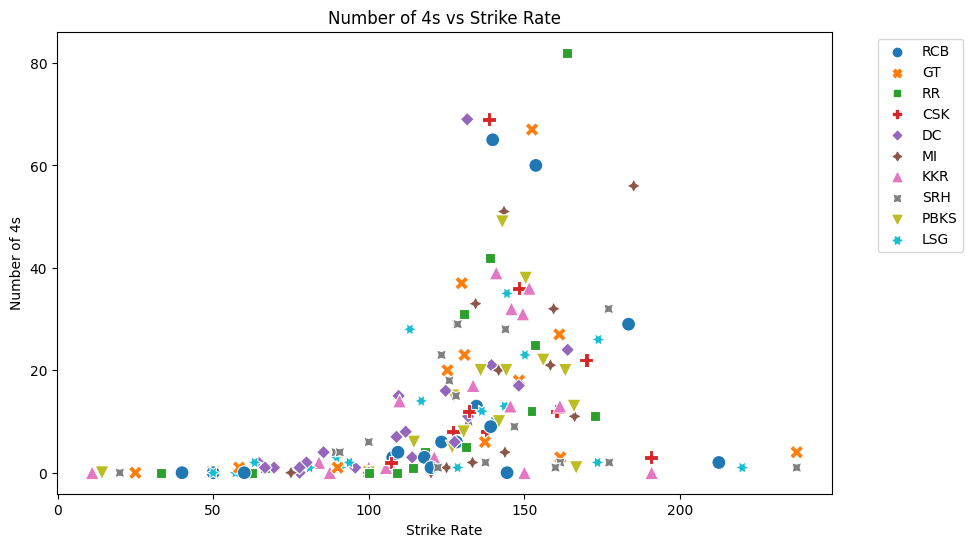

[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.9s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.9s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.9s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.9s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; to

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='SR', y='4s',hue='Team',style='Team', s=100)
plt.title('Number of 4s vs Strike Rate')
plt.xlabel('Strike Rate')
plt.ylabel('Number of 4s')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

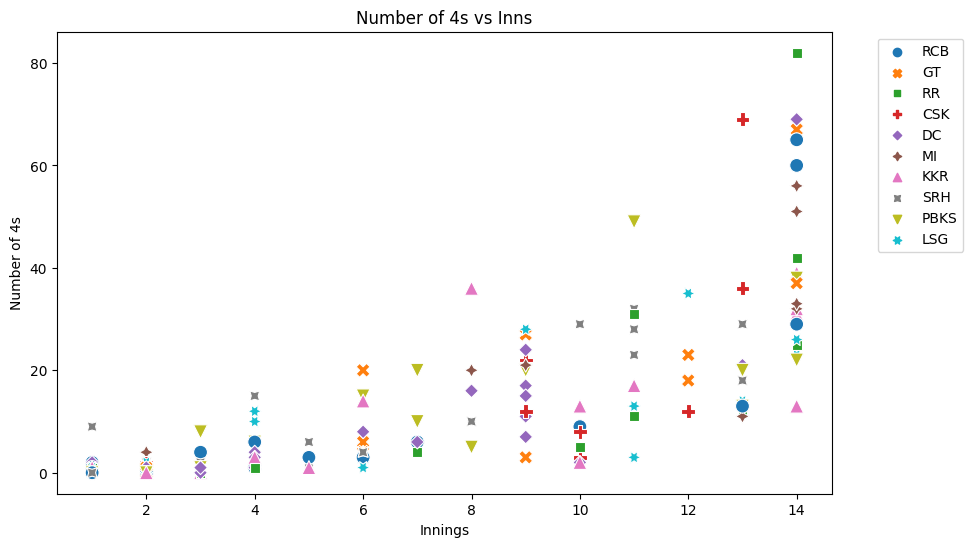

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Inns', y='4s',hue='Team',style='Team', s=100)
plt.title('Number of 4s vs Inns')
plt.xlabel('Innings')
plt.ylabel('Number of 4s')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

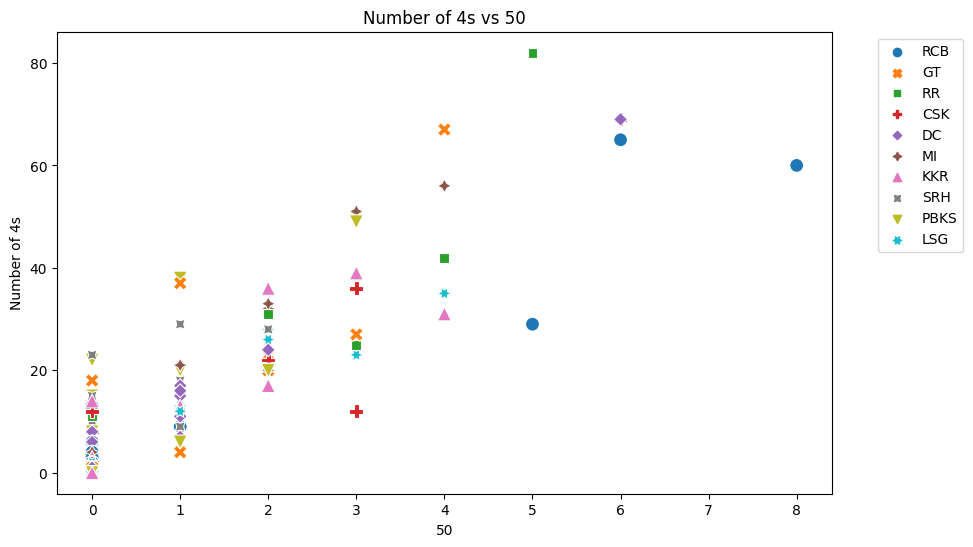

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='50', y='4s',hue='Team',style='Team', s=100)
plt.title('Number of 4s vs 50')
plt.xlabel('50')
plt.ylabel('Number of 4s')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

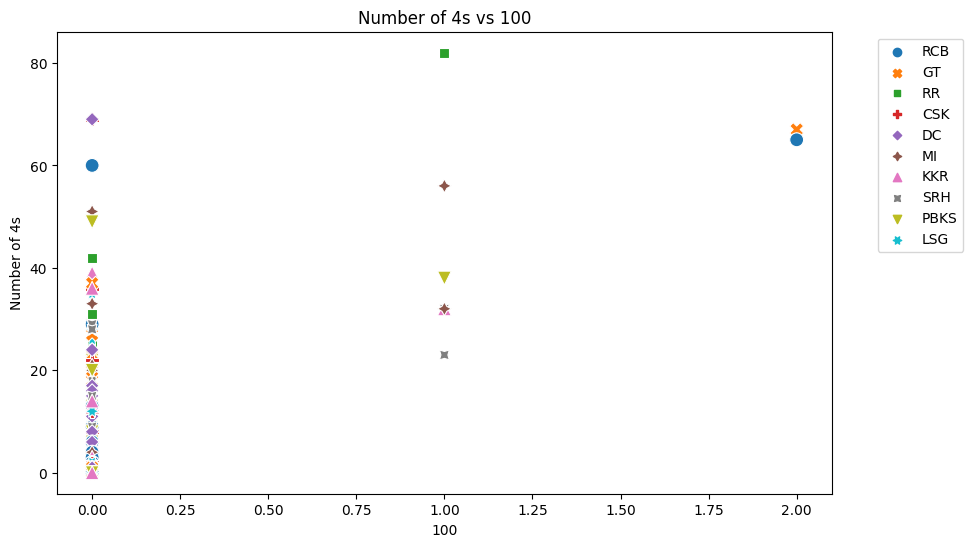

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='100', y='4s',hue='Team',style='Team', s=100)
plt.title('Number of 4s vs 100')
plt.xlabel('100')
plt.ylabel('Number of 4s')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# PLOT TO FIND RELATION BETWEEN (RUNS AND BALL FACED) AND (AVG.SCORE AND HIGH SCORE)

1.Runs are directly proportional to balls faced 

2.Average score and high score are somewhat proportional.

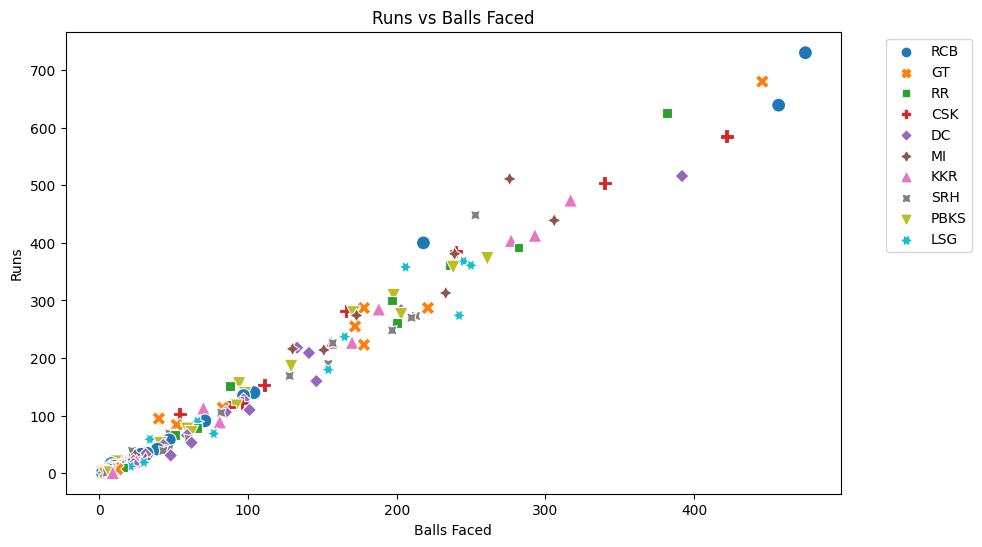

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BF', y='Runs', hue='Team', style='Team', s=100)
plt.title('Runs vs Balls Faced')
plt.xlabel('Balls Faced')
plt.ylabel('Runs')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

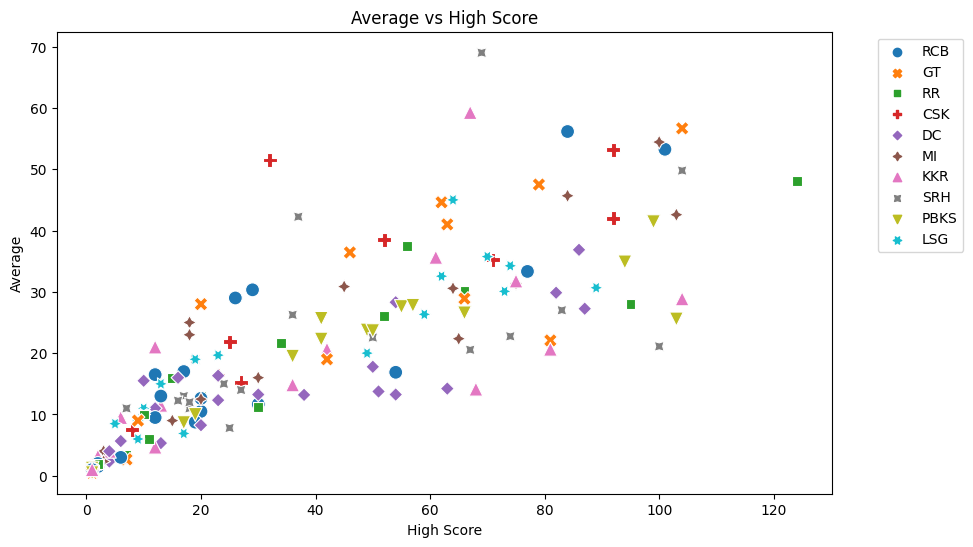

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='HS', y='Avg', hue='Team', style='Team', s=100)
plt.title('Average vs High Score')
plt.xlabel('High Score')
plt.ylabel('Average')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [14]:
df

,POS,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,Player Name,Team
0,1,14,14,1,730,84,56.15,475,153.68,0,8,60,36,Faf Du Plessis,RCB
1,2,14,14,2,680,104,56.67,446,152.46,2,4,67,22,Shubman Gill,GT
2,3,14,14,2,639,101,53.25,457,139.82,2,6,65,16,Virat Kohli,RCB
3,4,14,14,1,625,124,48.08,382,163.61,1,5,82,26,Yashasvi Jaiswal,RR
4,5,14,13,2,585,92,53.18,422,138.62,0,6,69,16,Devon Conway,CSK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,159,3,2,0,1,1,0.50,2,50.00,0,0,0,0,Yudhvir Singh,LSG
159,160,10,2,0,1,1,0.50,4,25.00,0,0,0,0,Noor Ahmad,GT
160,161,4,1,1,1,1,0.50,5,20.00,0,0,0,0,Fazalhaq Farooqi,SRH
161,162,10,2,0,1,1,0.50,7,14.28,0,0,0,0,Nathan Ellis,PBKS


# HEATMAP FOR FEATURE SELECTION I.E. ON WHICH FACTORS DOES 4s DEPENDS AND TO WHAT EXTENT

1.4s mainly depends upon "Runs","BF","HS" and "50".

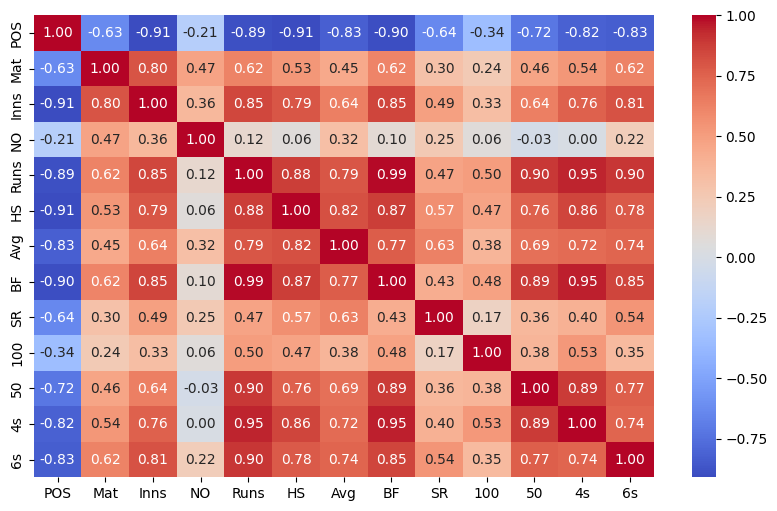

In [15]:
df_numeric = df.drop(columns=['Player Name', 'Team'])
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [16]:
df

,POS,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,Player Name,Team
0,1,14,14,1,730,84,56.15,475,153.68,0,8,60,36,Faf Du Plessis,RCB
1,2,14,14,2,680,104,56.67,446,152.46,2,4,67,22,Shubman Gill,GT
2,3,14,14,2,639,101,53.25,457,139.82,2,6,65,16,Virat Kohli,RCB
3,4,14,14,1,625,124,48.08,382,163.61,1,5,82,26,Yashasvi Jaiswal,RR
4,5,14,13,2,585,92,53.18,422,138.62,0,6,69,16,Devon Conway,CSK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,159,3,2,0,1,1,0.50,2,50.00,0,0,0,0,Yudhvir Singh,LSG
159,160,10,2,0,1,1,0.50,4,25.00,0,0,0,0,Noor Ahmad,GT
160,161,4,1,1,1,1,0.50,5,20.00,0,0,0,0,Fazalhaq Farooqi,SRH
161,162,10,2,0,1,1,0.50,7,14.28,0,0,0,0,Nathan Ellis,PBKS


# Feature selection

1.We know that 4s depend on 50 to a big extent but whenever i was using it then the mse score of my test data was getting reduced by a large number due to which i didn't took it as the feature.

2.I also observed that whenever i included Inns then the Mse score of my dataset get reduced due to which i took it as the feature.

3.Rest of the features where determined from heatmap.

In [40]:
Y = df['4s']
X = df.drop(columns=['4s', 'Player Name', 'Team','Mat','Avg','SR','50'])
print(X)

     POS  Inns  NO  Runs   HS   BF  100  6s
0      1    14   1   730   84  475    0  36
1      2    14   2   680  104  446    2  22
2      3    14   2   639  101  457    2  16
3      4    14   1   625  124  382    1  26
4      5    13   2   585   92  422    0  16
..   ...   ...  ..   ...  ...  ...  ...  ..
158  159     2   0     1    1    2    0   0
159  160     2   0     1    1    4    0   0
160  161     1   1     1    1    5    0   0
161  162     2   0     1    1    7    0   0
162  163     2   1     1    1    9    0   0

[163 rows x 8 columns]


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)
Y_train_pred = lr_model.predict(X_train)
Y_test_pred = lr_model.predict(X_test)
mse_train = mean_squared_error(Y_train, Y_train_pred)
mse_test = mean_squared_error(Y_test, Y_test_pred)

print("Mean Squared Error on Training Data:", mse_train)
print("Mean Squared Error on Testing Data:", mse_test)

Mean Squared Error on Training Data: 7.586327773375317
Mean Squared Error on Testing Data: 8.353646823235218


In [43]:
lr_model.score(X_test, Y_test)


0.9561326751062116

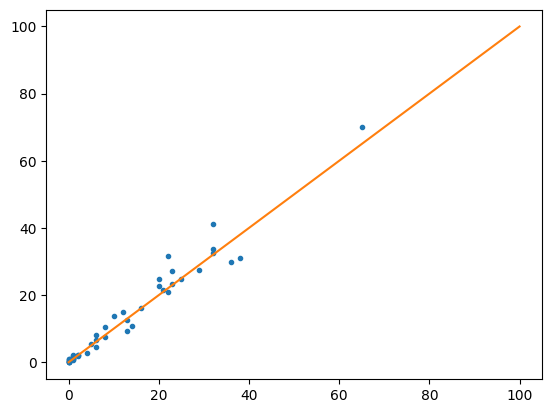

In [44]:
plt.plot(Y_test,Y_test_pred, '.')
x = np.linspace(0, 100, 10)
y = x
plt.plot(x, y)
plt.show()

In [39]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, Y_train, Y_test = train_test_split(X_poly, Y, test_size=0.3, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)

Y_train_poly_pred = poly_model.predict(X_train_poly)
Y_test_poly_pred = poly_model.predict(X_test_poly)

mse_train_poly = mean_squared_error(Y_train, Y_train_poly_pred)
mse_test_poly = mean_squared_error(Y_test, Y_test_poly_pred)

print("Polynomial Regression Mean Squared Error on Training Data:", mse_train_poly)
print("Polynomial Regression Mean Squared Error on Testing Data:", mse_test_poly)


Polynomial Regression Mean Squared Error on Training Data: 8.90775636746051
Polynomial Regression Mean Squared Error on Testing Data: 80.48332593182998


In [33]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, Y_train)

Y_train_rf_pred = rf_model.predict(X_train)
Y_test_rf_pred = rf_model.predict(X_test)

mse_train_rf = mean_squared_error(Y_train, Y_train_rf_pred)
mse_test_rf = mean_squared_error(Y_test, Y_test_rf_pred)

print("Random Forest Regressor Mean Squared Error on Training Data:", mse_train_rf)
print("Random Forest Regressor Mean Squared Error on Testing Data:", mse_test_rf)


Random Forest Regressor Mean Squared Error on Training Data: 2.9329482456140354
Random Forest Regressor Mean Squared Error on Testing Data: 28.805342857142847


In [45]:
from sklearn.model_selection import GridSearchCV

# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)


grid_search.fit(X_train, Y_train)


best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_


Y_train_rf_pred = best_rf_model.predict(X_train)
Y_test_rf_pred = best_rf_model.predict(X_test)


mse_train_rf = mean_squared_error(Y_train, Y_train_rf_pred)
mse_test_rf = mean_squared_error(Y_test, Y_test_rf_pred)
print("Random Forest Regressor Mean Squared Error on Training Data:", mse_train_rf)
print("Random Forest Regressor Mean Squared Error on Testing Data:", mse_test_rf)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] EN